#Weather Analysis:
The analysis is based on current weather obtained on june 20 and june 21. 
The plot of latitude vs weather indicates that the temperature is highest near the tropic of cancer with latitude around 
23.5 deg N. T The maximum temperatures in the northern hemisphere falls considerably moving north of the 23.5 deg latitude 
and moving south from the equator at 0 deg. There is also a wide variation in the maximum temperatures around the world 
based on the latitude. The southern hemishphere experiences lower temperatures when it is  summer in  the northern hemisphere.


There does not seem to any correlation of latitude to cloudiness, windspeed or humidity. More historical analysis of weather data may be  needed to infer any correlations between latitude and cloudiness, windspeed or humidity. There does seem to be a concentration of data around 45-50 % humidity. This value is considered very conducive for humans. 

In [15]:
#import required python libs.
import requests
import json
from pprint import pprint
from citipy import citipy
import random
import pandas as pd
import openweathermapy.core as owm
#import seaborn as sns
#config
from config import api_key
print(api_key)

105bc2c8a00675ea3a807f619fd5e9cc


In [2]:
#urlw for openweather
#url = "http://api.openweathermap.org/data/2.5/weather?"
cnt=0
latlist=list()
longlist=list()

for k in range(-180,181,20):
    longlist.append(k)
#longlist=[-180,-160,-140,-120,-100,-8-75,-50,0,50,75,100,150,175]

#list of cities
cityset=set()

#list of countries corresponding to the city.
cnylist=list()
#create list of longitudes for use as a random choice

for i in range(-90,90,+2):
#use latitude choice from -90 to +90 and get a city closest to that latitude.
    for j in longlist:
        lat=i
        long=j
        city = citipy.nearest_city(lat, long)
        cityset.add(city.city_name)
        cnylist.append(city.country_code)
print(str(len(cityset)))
print(str(len(cnylist)))


555
1710


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)
#print(api_key)

http://api.openweathermap.org/data/2.5/weather?appid=105bc2c8a00675ea3a807f619fd5e9cc&units=metric&q=


In [4]:
# Get current weather for all the cities using openweathermapy. 
#initialize count variables. 
cntcity=0
cntfail=0
     
# set up lists to hold reponse info
citylist=list()
cloudiness=list()
temp = list()
cnycode=list()
date=list()
humidity=list()
lat = list()
long=list()
tempmax=list()
windspeed=list()

# Loop through the list of cities and perform a request for weather data on each city.store results in lists. 
for city in cityset:
    #print(str(city))
    cntcity=cntcity+1
    print("Retrieving  data for record " + str(cntcity) + " " + city)
    try:
        weatherdetails = requests.get(query_url + city).json()
        #pprint(weatherdetails)
        citylist.append (weatherdetails["name"])
        cloudiness.append (weatherdetails["clouds"]["all"])
        cnycode.append (weatherdetails["sys"]["country"])
        #datetime=weatherdetails["dt"]
        date.append (weatherdetails["dt"])
        humidity.append (weatherdetails["main"]["humidity"])
        lat.append (weatherdetails["coord"]["lat"])
        long.append (weatherdetails["coord"]["lon"])
        tempmax.append (weatherdetails["main"]["temp_max"])
        windspeed.append (weatherdetails["wind"]["speed"])
    except:
        cntfail +=1
        print("Error in getting data for city " + city)
        print("error code: " + weatherdetails["cod"])
        print("message: " + weatherdetails["message"])

pprint(weatherdetails)        
print("Data Retrieval Complete....")
print("---------------------------------------------------------")
print("Number of cities weather data  not found: " + str(cntfail))

Retrieving  data for record 1 mogocha
Retrieving  data for record 2 nizhneyansk
Error in getting data for city nizhneyansk
error code: 404
message: city not found
Retrieving  data for record 3 buala
Retrieving  data for record 4 marcona
Error in getting data for city marcona
error code: 404
message: city not found
Retrieving  data for record 5 louisbourg
Error in getting data for city louisbourg
error code: 404
message: city not found
Retrieving  data for record 6 lucapa
Retrieving  data for record 7 novo aripuana
Retrieving  data for record 8 lixourion
Retrieving  data for record 9 clyde river
Retrieving  data for record 10 baixa grande
Retrieving  data for record 11 mombasa
Retrieving  data for record 12 khonuu
Error in getting data for city khonuu
error code: 404
message: city not found
Retrieving  data for record 13 port hedland
Retrieving  data for record 14 karauzyak
Error in getting data for city karauzyak
error code: 404
message: city not found
Retrieving  data for record 15 re

Retrieving  data for record 176 benidorm
Retrieving  data for record 177 cidreira
Retrieving  data for record 178 barrow
Retrieving  data for record 179 codrington
Retrieving  data for record 180 nizhniy ufaley
Retrieving  data for record 181 qinhuangdao
Retrieving  data for record 182 aflu
Error in getting data for city aflu
error code: 404
message: city not found
Retrieving  data for record 183 oum hadjer
Retrieving  data for record 184 coihaique
Retrieving  data for record 185 palabuhanratu
Error in getting data for city palabuhanratu
error code: 404
message: city not found
Retrieving  data for record 186 kilindoni
Retrieving  data for record 187 waraseoni
Retrieving  data for record 188 antofagasta
Retrieving  data for record 189 ron phibun
Retrieving  data for record 190 burnie
Retrieving  data for record 191 bargal
Error in getting data for city bargal
error code: 404
message: city not found
Retrieving  data for record 192 gisborne
Retrieving  data for record 193 hvolsvollur
Erro

Retrieving  data for record 333 gobabis
Retrieving  data for record 334 tawkar
Error in getting data for city tawkar
error code: 404
message: city not found
Retrieving  data for record 335 fuyang
Retrieving  data for record 336 lexington
Retrieving  data for record 337 faya
Retrieving  data for record 338 uniontown
Retrieving  data for record 339 charleston
Retrieving  data for record 340 nagai
Retrieving  data for record 341 witu
Retrieving  data for record 342 florence
Retrieving  data for record 343 norman wells
Retrieving  data for record 344 rosarito
Retrieving  data for record 345 anadyr
Retrieving  data for record 346 toliary
Error in getting data for city toliary
error code: 404
message: city not found
Retrieving  data for record 347 matara
Retrieving  data for record 348 bodden town
Retrieving  data for record 349 kidal
Retrieving  data for record 350 channel-port aux basques
Retrieving  data for record 351 apaxtla
Error in getting data for city apaxtla
error code: 404
message

Retrieving  data for record 501 cape town
Retrieving  data for record 502 emba
Retrieving  data for record 503 nouadhibou
Retrieving  data for record 504 serra
Retrieving  data for record 505 skelleftea
Retrieving  data for record 506 mahbubabad
Retrieving  data for record 507 black river
Retrieving  data for record 508 wieliczka
Retrieving  data for record 509 east london
Retrieving  data for record 510 new norfolk
Retrieving  data for record 511 itarantim
Retrieving  data for record 512 umea
Retrieving  data for record 513 naze
Retrieving  data for record 514 kapaa
Retrieving  data for record 515 sakakah
Error in getting data for city sakakah
error code: 404
message: city not found
Retrieving  data for record 516 tasiilaq
Retrieving  data for record 517 viedma
Retrieving  data for record 518 sur
Retrieving  data for record 519 airai
Retrieving  data for record 520 lowicz
Retrieving  data for record 521 peterhead
Retrieving  data for record 522 hobart
Retrieving  data for record 523 k

In [5]:
print(len(citylist))
print(len(cloudiness))
print(len(tempmax))
print(len(humidity))
print(len(lat))

503
503
503
503
503


In [6]:
#store results into a dictionary and convert to a dataframe. 
weatherdict=dict()
weatherdict={"City":citylist,"Cloudiness":cloudiness,"Country_code":cnycode,"Date":date,
             "Humidity":humidity,"Latitude":lat,"Longitude":long,"Max_temp":tempmax,
             "Wind_speed":windspeed}
#print(len(weatherdict))
weather_df = pd.DataFrame(weatherdict)
weather_df.tail(10)


,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max_temp,Wind_speed
493,Guarare,20,PA,1529585788,100,7.82,-80.28,22.63,1.51
494,Roald,75,NO,1529583600,93,62.58,6.12,10.00,5.70
495,Padang,56,ID,1529585788,100,-0.92,100.36,29.08,2.06
496,Pawai,44,IN,1529585788,45,24.27,80.17,35.68,1.26
497,Leningradskiy,24,RU,1529585788,92,69.38,178.42,-0.48,6.06
498,Mitrofanovka,8,UA,1529585788,53,45.45,34.68,30.68,2.96
499,Hamilton,20,CA,1529582400,77,43.26,-79.87,18.00,6.20
500,Yellowknife,75,CA,1529582400,72,62.45,-114.38,17.00,6.70
501,Fernandez,56,PH,1529585789,100,11.38,122.76,24.13,1.66
502,Manicaragua,0,CU,1529582340,94,22.14,-79.97,24.00,2.10


In [12]:
#Save weather data in a csv file for future reference and use. 
weather_df.to_csv("weatherdata.csv",index=False,header=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
City            503 non-null object
Cloudiness      503 non-null int64
Country_code    503 non-null object
Date            503 non-null int64
Humidity        503 non-null int64
Latitude        503 non-null float64
Longitude       503 non-null float64
Max_temp        503 non-null float64
Wind_speed      503 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 35.4+ KB


In [16]:
#Import dependencies for plotting.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
x_axis=weather_df["Latitude"]
y_axis_maxtemp=weather_df["Max_temp"]
y_axis_humidity=weather_df["Humidity"]
y_axis_cloudiness = weather_df["Cloudiness"]
y_axis_Windspeed = weather_df["Wind_speed"]

In [13]:
#Review cities that have temperature greater than 28 deg C.
weather_df.loc[weather_df["Max_temp"] >= 38]
#weather_df_sortedbytemp = weather_df.sort("Max_temp",axis=1,ascending=False,inplace=False)
#weather_df_sortedbytemp.head(10)


,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max_temp,Wind_speed
43,Iranshahr,20,IR,1529582400,8,27.21,60.69,46.00,4.10
112,Adrar,0,DZ,1529582400,14,27.87,-0.29,40.00,10.80
140,Zabol,0,IR,1529582400,9,31.03,61.49,42.00,9.80
154,Mecca,0,SA,1529582400,24,21.43,39.83,45.00,2.10
218,Gao,0,ML,1529585742,28,16.28,-0.04,40.18,4.26
224,Tessalit,0,ML,1529585743,11,20.20,1.01,41.98,6.91
242,Kurara,0,IN,1529585746,36,25.98,79.99,39.73,1.96
312,Kidal,0,ML,1529585759,17,18.44,1.41,41.53,2.41


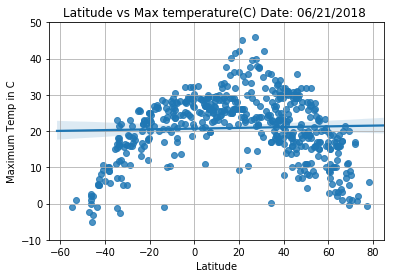

In [36]:
#Plot Latitude vs maximum temp(C)
sns.regplot(x_axis, y_axis_maxtemp, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label="Latitude vs Max temperature(C)", 
            color=None,marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Max temperature(C) Date: 06/21/2018 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-10,50)
plt.ylabel("Maximum Temp in C")
plt.savefig("latvsMaxtemp.png")

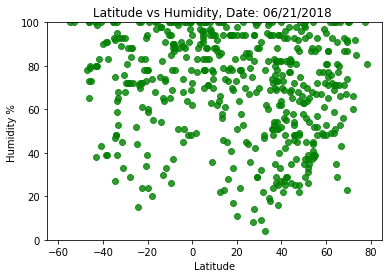

In [27]:
#Plot of latitude vs Humidity
sns.regplot(x_axis, y_axis_humidity, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="g", 
            marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Humidity, Date: 06/21/2018 ")
plt.xlim(-65,85)
plt.ylim(-0,100)
plt.ylabel("Humidity % ")
plt.savefig("latvshumidity.png")

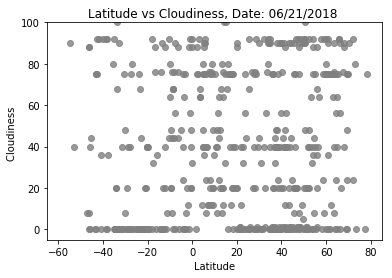

In [31]:
#Plot of latitude vs Cloudiness
sns.regplot(x_axis, y_axis_cloudiness, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="grey", 
            marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Cloudiness, Date: 06/21/2018 ")
plt.xlim(-65,85)
plt.ylim(-5,100)
plt.ylabel("Cloudiness ")
plt.savefig("latvscloudiness.png")

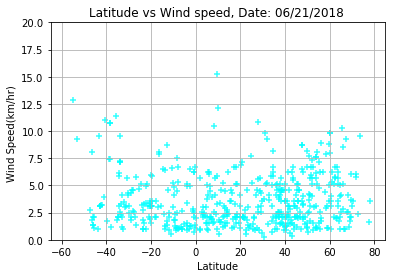

In [37]:
#Latitude vs windspeed
sns.regplot(x_axis, y_axis_Windspeed, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="cyan", 
            marker='+', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Wind speed, Date: 06/21/2018 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-0,20)
plt.ylabel("Wind Speed (km/hr) ")
plt.savefig("latvswindspeed.png")